In [300]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from analysis_util import *
from sklearn.model_selection import train_test_split
from sklearn import metrics


import seaborn as sns
'''this script concate each block per subject to a file wihthin subject called s103_df_concat.csv'''

'''subsequently save a concatenante file under rechain-beh called all_df_concat.csv '''
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette("deep")
# sns.set(style="whitegrid")
# top level dir 
# 




In [301]:

PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')


In [302]:

list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[3]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])

# get rid of a ;pw acc subject
df = df[df['sid']!='s108']


df = df[df['stimDur'] != 0.5]
df = df[df['stimDur'] != 0.05]
# df = df[df['stimDur'] != 0.1]



/tmp/ipykernel_289380/1660793124.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_289380/1660793124.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[3]'] = 1
/tmp/ipykernel_289380/1660793124.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [303]:
# correct the count
df = correct_samples_by_condition(df)

cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count_corrected'].to_numpy()

In [304]:
df.shape

(6850, 13)

In [305]:
df.head()


,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum,count_corrected
0,2.6166679859161377,2611,[1],10,0,0.25,0.12,[-1. 1. -1. 1. -1. 1. -1. -1. -1. -1. -1. ...,0,"[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, ...",s102,"[-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -2.0, ...",9
1,2.2499890327453613,2233,[1],8,1,0.25,0.12,[-1. -1. -1. 1. 1. 1. 1. 1. -1. -1. -1. -...,0,"[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1...",s102,"[-1.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, ...",7
2,2.1333320140838623,2118,[1],8,0,0.25,0.12,[ 1. -1. -1. -1. 1. 1. -1. -1. -1. -1. 1. ...,0,"[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, ...",s102,"[1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -1.0, -2.0, ...",7
3,1.2833738327026367,1270,[1],5,1,0.25,0.12,[ 1. 1. 1. 1. -1. 1. 1. -1. -1. -1. 1. -...,0,"[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1....",s102,"[1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ...",4
4,2.3333139419555664,2318,[1],9,1,0.25,0.12,[-1. 1. -1. 1. 1. -1. 1. 1. 1. -1. -1. -...,0,"[-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1....",s102,"[-1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0...",8


In [306]:
count.max()

29

In [307]:
# create a matrix of +1 and -1 with NaNs if the chain terminates

chain_matrix = get_chain_matrix(sequence, count)


In [329]:
# set the fixed bound

fixed_bound = [3] 
position_range = np.arange(2,20)

TRUE_N = []
TOTAL_N = []
FPR_TRAIN =[]
FPR_TEST =[]
TPR_TRAIN=[]
TPR_TEST=[]
AUC_TRAIN =[]
AUC_TEST =[]
POSITION_OF_SAMPLES=[]
N_TRAIN =[]
N_TEST = []
BOUND_FIXED = []
AUC_THRESH_TRAIN = []
AUC_THRESH_TEST =[]
for position_terminate in position_range:
    for bound in fixed_bound:
        if position_terminate+1 >= bound:  # bound is ponly position if it's less than or equal to position
            dataset, dataset_resp = make_dataset(position_terminate, count, chain_matrix)
            TRUE_N.append(dataset_resp.sum())
            TOTAL_N.append(len(dataset))
            x_train, x_test, y_train, y_test = train_test_split(
                dataset, dataset_resp, test_size=0.3, random_state=2024
            )
            N_TRAIN.append(len(x_train))
            N_TEST.append(len(x_test))
            # integrate evidence    
            x_train_evidence = get_abs_evidence(x_train)[:,-1]
            x_test_evidence = get_abs_evidence(x_test)[:,-1]

            # predict prob
            y_pred_prob_train = x_train_evidence>=bound
            y_pred_prob_test = x_test_evidence>=bound

            # plot ROC

            fpr_train, tpr_train, thresh_train = metrics.roc_curve(y_train, y_pred_prob_train)
            fpr_test, tpr_test, thresh_test = metrics.roc_curve(y_test, y_pred_prob_test)
            auc_train = metrics.auc(fpr_train, tpr_train)
            auc_test = metrics.auc(fpr_test, tpr_test)
            FPR_TRAIN.append(fpr_train)
            FPR_TEST.append(fpr_test)
            TPR_TRAIN.append(tpr_train)
            TPR_TEST.append(tpr_test)
            AUC_TRAIN.append(auc_train)
            AUC_TEST.append(auc_test)
            POSITION_OF_SAMPLES.append(position_terminate)
            AUC_THRESH_TRAIN.append(thresh_train)
            AUC_THRESH_TEST.append(thresh_test)
            BOUND_FIXED.append(bound)
    # plt.scatter(x_train_evidence,y_pred_prob_train)
    # plt.show()


In [330]:
def plot_performance_matrix(performance_matrix):
    fig, ax = plt.subplots(1,1,figsize = (6,4))
    performance_matrix = np.ma.masked_where(performance_matrix==0,performance_matrix)
    cmap = mpl.cm.get_cmap("OrRd").copy()

    cmap.set_bad(color='black')
    # plt.imshow(performance_matrix_train,interpolation='none', vmin=0.5, vmax=1, cmap = "OrRd")
    ax.set_ylabel("level of evidence integrated")
    ax.set_xlabel("position at termination")
    ax.set_xticks(np.arange(1, max(position_range)+2))
    ax.set_yticks(fixed_bound)

    # plt.colorbar()
    im = ax.pcolor(performance_matrix, vmin=0.5, vmax=0.8, cmap = cmap,edgecolors='k', linewidths=1)
    fig.colorbar(im)
    return fig, ax

In [331]:
performance_matrix_train = np.zeros((max(fixed_bound), max(position_range+1)))
performance_matrix_test = np.zeros((max(fixed_bound), max(position_range+1)))

In [332]:
for i, j in enumerate(POSITION_OF_SAMPLES):
    bound = BOUND_FIXED[i]
    performance_matrix_train[bound-1,j] = AUC_TRAIN[i]
    
for i, j in enumerate(POSITION_OF_SAMPLES):
    bound = BOUND_FIXED[i]
    performance_matrix_test[bound-1,j] = AUC_TEST[i]

/tmp/ipykernel_289380/2808678788.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("OrRd").copy()


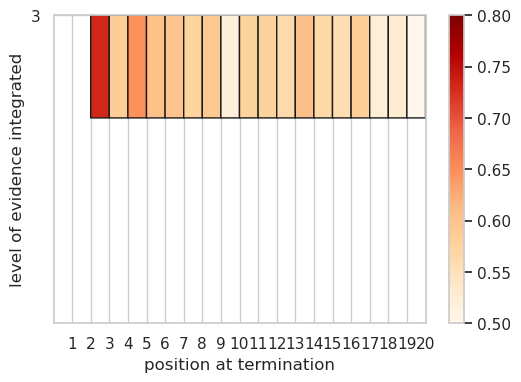

In [333]:
fig, ax = plot_performance_matrix(performance_matrix_test)

Text(0.5, 1.0, 'Train Data AUC')

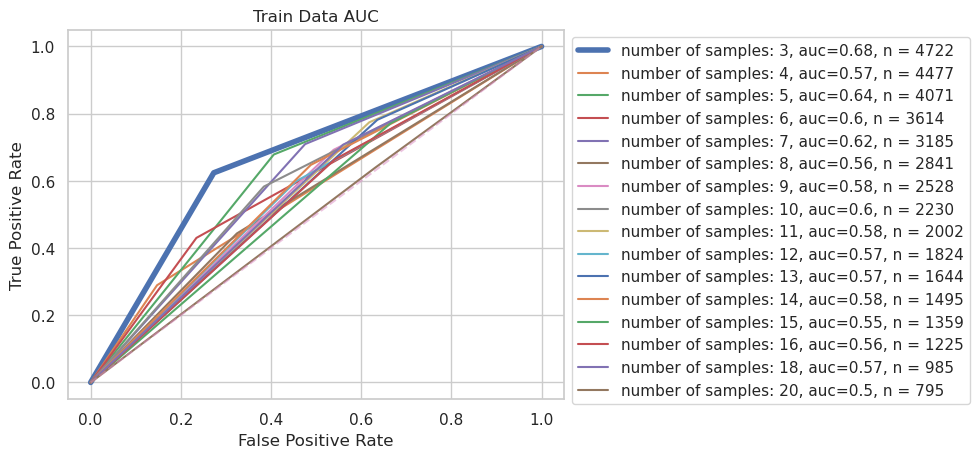

In [334]:
fig,ax = plot_roc(FPR_TRAIN,TPR_TRAIN,AUC_TRAIN, [i+1 for i in POSITION_OF_SAMPLES], N_TRAIN, auc_cutoff = 0.5)
ax.set_title("Train Data AUC")

Text(0.5, 1.0, 'Test Data AUC')

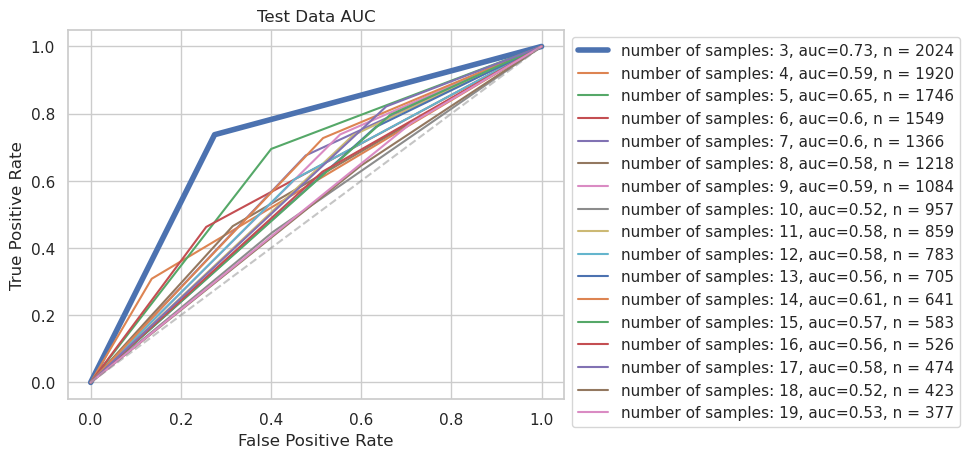

In [335]:
fig,ax = plot_roc(FPR_TEST,TPR_TEST,AUC_TEST, [i+1 for i in POSITION_OF_SAMPLES], N_TEST, auc_cutoff = 0.5)
ax.set_title("Test Data AUC")

In [340]:
AUC_TEST

[0.7312842712842713,
 0.5866304302026715,
 0.6473059508408796,
 0.6033354127677272,
 0.599332090711401,
 0.5750742093236807,
 0.5924296649766378,
 0.5218958186489621,
 0.5768758830966014,
 0.5763232338271421,
 0.5640356333585106,
 0.6059571827489917,
 0.5660675578034682,
 0.5566000072587377,
 0.5829630895420369,
 0.5229166666666667,
 0.5304511278195488,
 0.48990240240240235]

In [342]:
POSITION_OF_SAMPLES

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

/tmp/ipykernel_289380/469110591.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


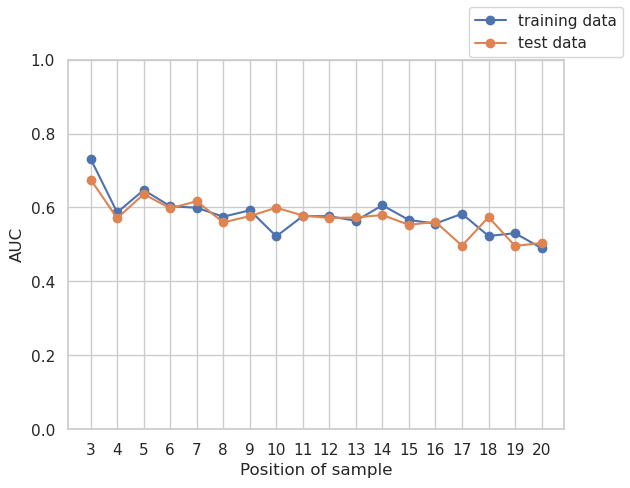

In [361]:
from pylab import MaxNLocator
fig, ax = plot_roc_per_sample_position([i+1 for i in POSITION_OF_SAMPLES], AUC_TEST, AUC_TRAIN)

ax.set_xticks([i+1 for i in POSITION_OF_SAMPLES])

fig.show()

In [356]:
ax.get_xticks()

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ])